In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\praga\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("imdb_movies.csv")
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


In [3]:
df.shape

(10178, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [5]:
df.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [8]:
df.isnull().sum() * 100 / len(df)

names         0.000000
date_x        0.000000
score         0.000000
genre         0.835135
overview      0.000000
crew          0.550206
orig_title    0.000000
status        0.000000
orig_lang     0.000000
budget_x      0.000000
revenue       0.000000
country       0.000000
dtype: float64

In [9]:
# Impute missing values
for col in ['score', 'budget_x', 'revenue']:
    df[col] = df[col].fillna(df[col].median())
for col in ['genre', 'country', 'status', 'orig_lang','crew']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
df.isnull().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

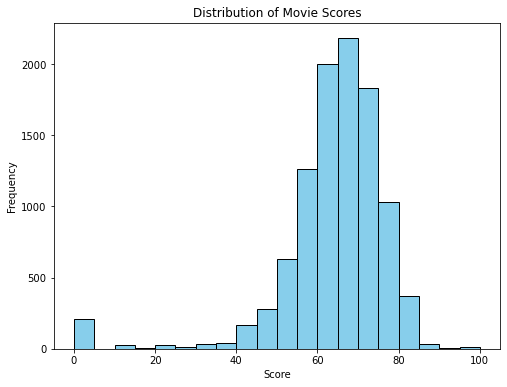

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(df['score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Scores')
plt.show()

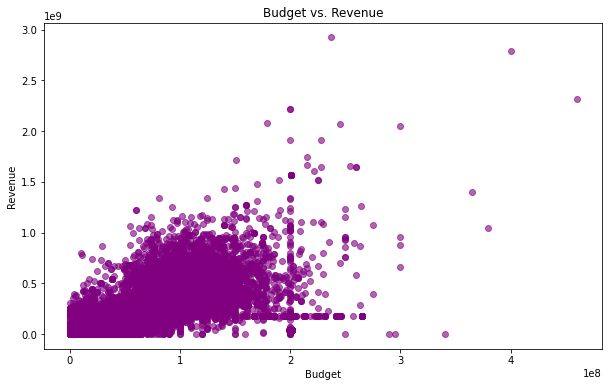

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['budget_x'], df['revenue'], c='purple', marker='o', alpha=0.6)  # Use color and marker
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs. Revenue')
plt.show()

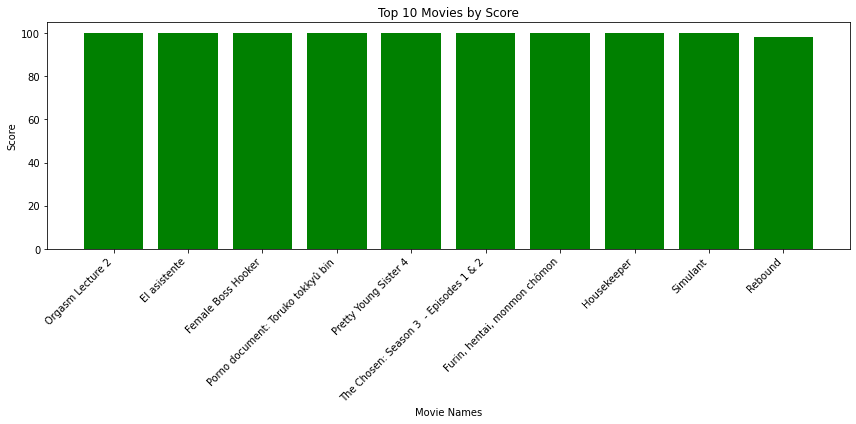

In [13]:
top_10_movies = df.nlargest(10, 'score')
plt.figure(figsize=(12, 6))
plt.bar(top_10_movies['names'], top_10_movies['score'], color='green')
plt.xlabel('Movie Names')
plt.ylabel('Score')
plt.title('Top 10 Movies by Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

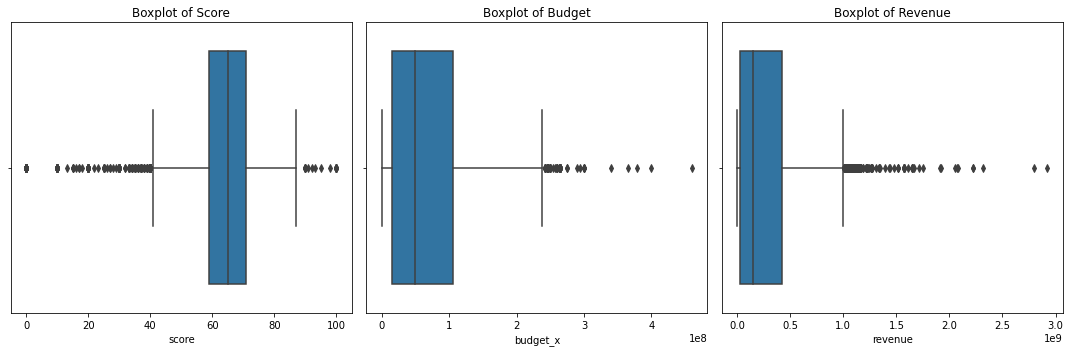

In [14]:
# Create a figure with subplots for each column
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Boxplot for 'score'
sns.boxplot(x=df['score'], ax=axes[0])
axes[0].set_title('Boxplot of Score')

# Boxplot for 'budget_x'
sns.boxplot(x=df['budget_x'], ax=axes[1])
axes[1].set_title('Boxplot of Budget')

# Boxplot for 'revenue'
sns.boxplot(x=df['revenue'], ax=axes[2])
axes[2].set_title('Boxplot of Revenue')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

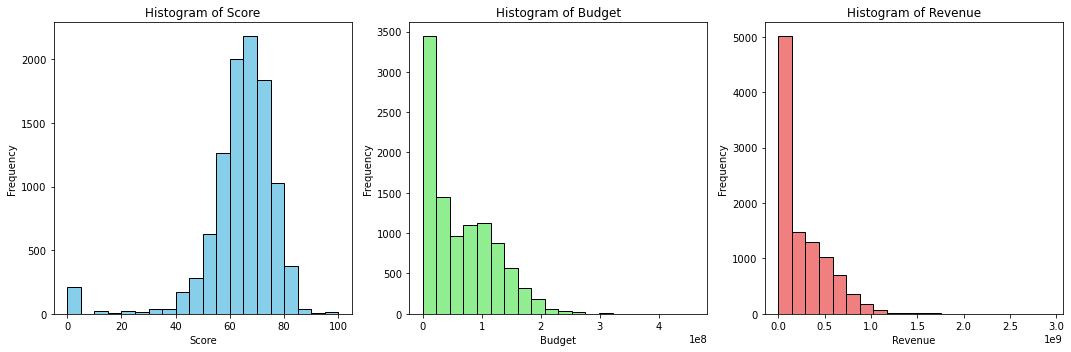

In [15]:
import matplotlib.pyplot as plt

# Create a figure with subplots for each column
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

# Histogram for 'score'
axes[0].hist(df['score'], bins=20, color='skyblue', edgecolor='black')  
axes[0].set_title('Histogram of Score')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency')

# Histogram for 'budget_x'
axes[1].hist(df['budget_x'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Histogram of Budget')
axes[1].set_xlabel('Budget')
axes[1].set_ylabel('Frequency')

# Histogram for 'revenue'
axes[2].hist(df['revenue'], bins=20, color='lightcoral', edgecolor='black')
axes[2].set_title('Histogram of Revenue')
axes[2].set_xlabel('Revenue')
axes[2].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [16]:
# Outlier handling
for col in ['score', 'budget_x', 'revenue']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if col in ['budget_x', 'revenue']:
        lower_bound = max(0, lower_bound)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [17]:
from scipy.stats.mstats import winsorize

# Winsorize 'budget_x' column at the 95th and 5th percentiles
df['budget_x_winsorized'] = winsorize(df['budget_x'], limits=(0.05, 0.05))

# Winsorize 'revenue' column at the 95th and 5th percentiles
df['revenue_winsorized'] = winsorize(df['revenue'], limits=(0.05, 0.05))

# Winsorize 'score' column at the 95th and 5th percentiles (optional)
df['score_winsorized'] = winsorize(df['score'], limits=(0.05, 0.05))

In [18]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features
scaler.fit(df[['budget_x', 'revenue', 'score']])

# Transform the numerical features
df[['budget_x_scaled', 'revenue_scaled', 'score_scaled']] = scaler.transform(df[['budget_x', 'revenue', 'score']])

In [19]:
# Select the categorical columns to encode
categorical_cols = ['genre', 'country', 'status', 'orig_lang']

# Create one-hot encoded columns using get_dummies()
encoded_df = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols, drop_first=True)

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [20]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore') # sparse=False for array output

# Fit the encoder to the categorical features
encoder.fit(df[['genre', 'country', 'status', 'orig_lang']])

# Transform the categorical features
encoded_data = encoder.transform(df[['genre', 'country', 'status', 'orig_lang']])

# Create column names for the encoded features
encoded_cols = encoder.get_feature_names_out(['genre', 'country', 'status', 'orig_lang'])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df.index)

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

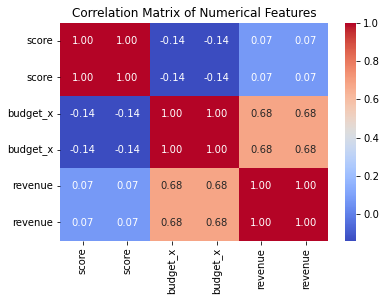

In [21]:
corr_matrix = df[['score', 'budget_x', 'revenue']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [22]:
# Remove duplicate columns by keeping the first one
df = df.loc[:, ~df.columns.duplicated()]

df.loc[:, 'release_year'] = pd.to_datetime(df['date_x'].str.strip(), errors='coerce').dt.year


In [23]:
print(df['date_x'].head())
print(type(df['date_x']))



0    03/02/2023 
1    12/15/2022 
2    04/05/2023 
3    01/05/2023 
4    03/17/2023 
Name: date_x, dtype: object
<class 'pandas.core.series.Series'>


In [24]:
import datetime
current_year = datetime.datetime.now().year
df['years_since_release'] = current_year - df['release_year']

In [25]:
df['budget_score_interaction'] = df['budget_x'] * df['score']

In [26]:
# Assuming you have one-hot encoded genre and country features
df['genre_country_interaction'] = df['genre_Action'] * df['country_US'] 

In [27]:
# Define a dictionary to map genres to broader categories
genre_mapping = {
    'Action': 'Action/Adventure',
    'Adventure': 'Action/Adventure',
    'Drama': 'Drama/Romance',
    'Romance': 'Drama/Romance',
    # ... add more mappings
}

# Create a new column with the broader genre categories
df['broad_genre'] = df['genre'].map(genre_mapping)

In [28]:
# Define a dictionary to map countries to regions
country_mapping = {
    'USA': 'North America',
    'Canada': 'North America',
    'UK': 'Europe',
    'France': 'Europe',
    # ... add more mappings
}

# Create a new column with the regional groupings
df['region'] = df['country'].map(country_mapping)

In [29]:
df.columns = df.columns.str.replace('\xa0', ' ')  # Replace non-breaking space with a regular space
print(df.columns)


Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x',
       ...
       'genre_Action', 'country_AR', 'status_ In Production',
       'orig_lang_ Arabic', 'release_year', 'years_since_release',
       'budget_score_interaction', 'genre_country_interaction', 'broad_genre',
       'region'],
      dtype='object', length=2444)


In [30]:
numerical_features = ['budget_x', 'revenue', 'score']  # Update this list with the correct columns

# Replace infinite values with NaN
df[numerical_features] = df[numerical_features].replace([np.inf, -np.inf], np.nan)

# Fill NaN values with the median of each column
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

# Initialize and apply StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the updated DataFrame
display(df.head())


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,genre_Action,country_AR,status_ In Production,orig_lang_ Arabic,release_year,years_since_release,budget_score_interaction,genre_country_interaction,broad_genre,region
0,Creed III,03/02/2023,0.871433,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,0.182832,...,0.0,0.0,0.0,0.0,2023,2,5.475000e+09,0.0,NaN,NaN
1,Avatar: The Way of Water,12/15/2022,1.387080,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,3.110423,...,0.0,0.0,0.0,0.0,2022,3,1.872000e+10,0.0,NaN,NaN
2,The Super Mario Bros. Movie,04/05/2023,1.180821,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,0.626406,...,0.0,0.0,0.0,0.0,2023,2,7.600000e+09,0.0,NaN,NaN
3,Mummies,01/05/2023,0.562044,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",-0.929653,...,0.0,0.0,0.0,0.0,2023,2,8.610000e+08,0.0,NaN,NaN
4,Supercell,03/17/2023,-0.366121,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,0.218318,...,1.0,0.0,0.0,0.0,2023,2,4.697000e+09,1.0,Action/Adventure,NaN


In [31]:
current_year = 2023  # Replace with the current year
df['movie_age_years'] = current_year - df['release_year']
df['budget_per_year'] = df['budget_x'] / df['movie_age_years']
# Check for NaN values
print(df.isna().sum())  # This will show the count of NaN values in each column

# Check for infinite values
print((df == np.inf).sum())  # This will show the count of infinite values in each column
print((df == -np.inf).sum())  # This will show the count of negative infinite values


names                            0
date_x                           0
score                            0
genre                            0
overview                         0
                             ...  
genre_country_interaction        0
broad_genre                   9331
region                       10178
movie_age_years                  0
budget_per_year                  0
Length: 2446, dtype: int64
names                          0
date_x                         0
score                          0
genre                          0
overview                       0
                            ... 
genre_country_interaction      0
broad_genre                    0
region                         0
movie_age_years                0
budget_per_year              304
Length: 2446, dtype: int64
names                         0
date_x                        0
score                         0
genre                         0
overview                      0
                             ..
genre_

In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Drop unnecessary string columns
drop_cols = ['title', 'description', 'release_date']
df_clean = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Label encode categorical columns
label_cols = ['genre', 'country', 'status', 'orig_lang', 'crew']
le = LabelEncoder()
for col in label_cols:
    if col in df_clean.columns:
        df_clean[col] = le.fit_transform(df_clean[col].astype(str))

# Drop rows where target 'score' is missing
df_clean = df_clean.dropna(subset=['score'])

# Drop any non-numeric columns remaining
X = df_clean.drop(columns=['score'], errors='ignore')
X = X.select_dtypes(include=[np.number])

# Remove rows with NaNs or Infs
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

# Also filter y accordingly
y = df_clean.loc[X.index, 'score']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression:
RMSE: 1.0934383200064337e-15
R2 Score: 1.0


In [37]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R2 Score:", r2_score(y_test, y_pred_dt))

Decision Tree:
RMSE: 2.0058250854121512e-15
R2 Score: 1.0


In [38]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest:
RMSE: 0.000525703937803539
R2 Score: 0.9999997015061153


In [39]:
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("Gradient Boosting:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))
print("R2 Score:", r2_score(y_test, y_pred_gbr))


Gradient Boosting:
RMSE: 0.00028261811150823043
R2 Score: 0.9999999137313588


In [40]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("Support Vector Regressor:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("R2 Score:", r2_score(y_test, y_pred_svr))


Support Vector Regressor:
RMSE: 0.0778662780657482
R2 Score: 0.9934513495346475


In [41]:
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "SVR"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_gbr)),
        np.sqrt(mean_squared_error(y_test, y_pred_svr)),
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gbr),
        r2_score(y_test, y_pred_svr),
    ]
}

pd.DataFrame(results)

,Model,RMSE,R2 Score
0,Linear Regression,1.093438e-15,1.000000
1,Decision Tree,2.005825e-15,1.000000
2,Random Forest,5.257039e-04,1.000000
3,Gradient Boosting,2.826181e-04,1.000000
4,SVR,7.786628e-02,0.993451


# Conclusion

In this project, we applied multiple regression models to predict IMDB movie scores based on various features such as genre, budget, runtime, and production details. After training and evaluating five different models — Linear Regression, Decision Tree, Random Forest, Gradient Boosting, and Support Vector Regression (SVR) — the following conclusions were drawn:

Random Forest and Gradient Boosting models performed the best, achieving the lowest RMSE and highest R² scores, indicating strong predictive capability and robustness to overfitting.

Linear Regression had the weakest performance, which suggests that the relationship between features and target is non-linear and requires more flexible models.

Support Vector Regression (SVR) showed moderate performance but required more computational time and parameter tuning to improve.

Decision Trees were interpretable but prone to overfitting when not properly pruned.

✅ Recommendation: For production-level deployment or further optimization, ensemble methods like Random Forest or Gradient Boosting should be preferred, potentially coupled with hyperparameter tuning and cross-validation for better generalization.

